# Principal Component Analysis (PCA) for anomaly detection

Principal Component Analysis (PCA) can be used for anomaly detection by leveraging the fact that PCA captures the main variance in the data through its principal components. Anomalies or outliers are typically observations that do not conform to the general pattern of the data, and they often lie in the lower variance dimensions that PCA tends to ignore. Here's how PCA can be used for anomaly detection:

1. **Dimensionality Reduction**: PCA is applied to the dataset to reduce its dimensionality. The first few principal components capture the most significant variance in the data, while the remaining components capture less variance and are more likely to contain noise and anomalies.
2. **Reconstruction Error**: Each data point in the original dataset is projected onto the principal component space and then reconstructed back into the original space. The reconstruction error for each data point is calculated, which is the difference between the original data point and its reconstruction.
3. **Identifying Anomalies**: Data points with high reconstruction errors are considered anomalies. This is because anomalies are not well-represented by the principal components that capture the main variance in the data, leading to larger errors when they are reconstructed.
4. **Thresholding**: A threshold is set to distinguish between normal data points and anomalies. Data points with reconstruction errors above the threshold are classified as anomalies. The threshold can be determined based on domain knowledge, statistical criteria, or by analyzing the distribution of reconstruction errors.
5. **Visualization**: In the reduced dimensionality space, anomalies can often be visualized more easily, as they may stand out from the normal data points.

PCA-based anomaly detection is particularly useful in scenarios where the data is high-dimensional and the anomalies are subtle. It is commonly used in fields such as:

- **finance** (for detecting fraudulent transactions),
- **manufacturing** (for detecting defects in products), and
- **network security** (for detecting intrusions or unusual traffic patterns).

## Limitations of PCA approach to anomaly detection

### Linearity of PCA method
It's important to note that PCA-based anomaly detection may not be effective if the anomalies are not well-separated from the normal data in the lower variance dimensions or if the data does not have a linear structure that PCA assumes.

PCA (Principal Component Analysis) is a linear dimensionality reduction technique, which means it assumes a linear relationship between the features in the dataset. This assumption has implications for its use in anomaly detection:

1. **Linearity Assumption:** PCA projects the original data onto a new set of orthogonal axes (principal components) that maximize the variance in the data. This process is linear, meaning that PCA looks for a linear combination of the original features that captures the most variance. If the underlying structure of the data is non-linear, PCA may not be able to effectively capture the relationships between features.

2. **Separation of Anomalies:** For PCA-based anomaly detection to be effective, the anomalies should ideally be located in the lower variance dimensions that PCA tends to discard. This is because PCA retains the components with the highest variance, which are assumed to represent the normal structure of the data. Anomalies that do not conform to this structure are expected to lie in the dimensions with lower variance. However, if the anomalies are not well-separated from the normal data in these lower variance dimensions, PCA may not be able to effectively identify them as outliers.

3. **Non-linear Anomalies:** If the data contains non-linear relationships or if the anomalies themselves have a non-linear structure, PCA may fail to detect them. This is because the linear transformation applied by PCA may not be suitable for capturing non-linear patterns. In such cases, non-linear dimensionality reduction techniques or non-linear anomaly detection methods may be more appropriate.

4. **Impact on Anomaly Detection:** The effectiveness of PCA for anomaly detection depends on how well the assumptions of linearity and separation of anomalies hold for the given dataset. If these assumptions are not met, the resulting principal components may not accurately represent the underlying structure of the data, and anomalies may not be easily distinguishable in the reduced dimensionality space.

In summary, while PCA can be a powerful tool for anomaly detection in datasets with linear structures and well-separated anomalies, its effectiveness may be limited in the presence of non-linear relationships or non-linear anomalies. In such cases, alternative approaches that can capture non-linear patterns may be more suitable.


### Scaling of data during pre-processing

In the context of anomaly detection using PCA, the choice of scaling method can have significant implications:

1. **Standard Scaling:** Standard scaling (also known as z-score normalization) involves subtracting the mean and dividing by the standard deviation for each feature. While this is effective in normalizing the data, it is sensitive to outliers. Anomalies can skew the mean and inflate the standard deviation, leading to distorted scaling. As a result, when PCA is applied after standard scaling, the principal components might be influenced more by the outliers than by the underlying structure of the normal data.

2. **Robust Scaling:** To mitigate the impact of outliers, robust scalers can be used. Robust scalers, such as those based on median and interquartile range (IQR), are less sensitive to outliers. For example, the median and IQR are used in the following formula for robust scaling:

$$X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)}$$

   By using the median and IQR, the scaling is less affected by extreme values. This means that the principal components obtained after applying PCA are more representative of the underlying structure of the normal data, rather than being influenced by outliers.

3. **Implications of Using Robust Scaling:**
   - **Better Anomaly Detection:** By using robust scaling, PCA can better capture the variance in the normal data, leading to more accurate anomaly detection.
   - **Reduced Sensitivity to Outliers:** The principal components are less likely to be dominated by outliers, making the model more robust.
   - **Improved Interpretability:** The reduced influence of outliers on the scaling and subsequent PCA can lead to more interpretable principal components that better reflect the true structure of the data.

4. **Limitations:**
   - **Not a Panacea:** While robust scaling can mitigate the impact of outliers, it does not completely eliminate their influence. Outliers can still affect the results, especially if they are numerous or extreme.
   - **Trade-offs:** Robust scaling might reduce the sensitivity to outliers, but it can also lead to a loss of information about the variability in the data.

In conclusion, while standard scaling is commonly used before PCA, robust scaling can be a valuable alternative in the context of anomaly detection. It helps to reduce the impact of outliers on the PCA results, leading to more reliable identification of anomalies. However, it is important to be aware of the limitations and trade-offs associated with robust scaling and to consider the specific characteristics of the dataset when choosing a scaling method.


# Example 1: Synthetic data

To demonstrate the use of PCA for anomaly detection in a finance dataset, we'll use a synthetic dataset that simulates stock returns. We'll introduce some anomalies into the dataset to illustrate how PCA can be used to detect them and discuss its limitations.

## Step 0: We will neeed the following libraries and functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Step 1: Let's create the synthetic dataset:

In [1]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic stock return data
num_stocks = 50
num_days = 200
normal_returns = np.random.normal(0, 0.01, size=(num_days, num_stocks))

# Introduce anomalies in the data
anomalies = np.random.normal(0, 0.05, size=(20, num_stocks))
normal_returns[50:70] += anomalies

# Create a DataFrame
dates = pd.date_range(start='2021-01-01', periods=num_days, freq='B')
stock_names = [f'Stock {i+1}' for i in range(num_stocks)]
data = pd.DataFrame(normal_returns, index=dates, columns=stock_names)

In [2]:
data

,Stock 1,Stock 2,Stock 3,Stock 4,Stock 5,Stock 6,Stock 7,Stock 8,Stock 9,Stock 10,...,Stock 41,Stock 42,Stock 43,Stock 44,Stock 45,Stock 46,Stock 47,Stock 48,Stock 49,Stock 50
2021-01-01,0.004967,-0.001383,0.006477,0.015230,-0.002342,-0.002341,0.015792,0.007674,-0.004695,0.005426,...,0.007385,0.001714,-0.001156,-0.003011,-0.014785,-0.007198,-0.004606,0.010571,0.003436,-0.017630
2021-01-04,0.003241,-0.003851,-0.006769,0.006117,0.010310,0.009313,-0.008392,-0.003092,0.003313,0.009755,...,0.000971,0.009686,-0.007021,-0.003277,-0.003921,-0.014635,0.002961,0.002611,0.000051,-0.002346
2021-01-05,-0.014154,-0.004206,-0.003427,-0.008023,-0.001613,0.004041,0.018862,0.001746,0.002576,-0.000744,...,0.002275,0.013071,-0.016075,0.001846,0.002599,0.007818,-0.012370,-0.013205,0.005219,0.002970
2021-01-06,0.002505,0.003464,-0.006800,0.002323,0.002931,-0.007144,0.018658,0.004738,-0.011913,0.006566,...,-0.004465,0.008564,0.002141,-0.012457,0.001732,0.003853,-0.008839,0.001537,0.000582,-0.011430
2021-01-07,0.003578,0.005608,0.010831,0.010538,-0.013777,-0.009378,0.005150,0.005138,0.005150,0.038527,...,-0.007925,-0.001147,0.005050,0.008658,-0.012003,-0.003345,-0.004749,-0.006533,0.017655,0.004050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,-0.004846,0.001434,-0.010757,0.003366,-0.004577,0.010467,0.007736,-0.004957,-0.001267,-0.005511,...,0.008227,0.003353,0.001803,-0.009561,-0.005908,0.012450,-0.000515,0.003754,-0.001152,-0.011831
2021-10-04,0.009338,0.005032,0.023056,-0.010156,0.008226,-0.013115,0.001573,0.009765,-0.020721,-0.002049,...,-0.011069,0.013345,-0.005472,-0.012514,-0.004310,-0.002386,0.002684,0.002510,-0.008282,0.006857
2021-10-05,-0.006392,-0.001563,0.006868,-0.006418,-0.005694,0.005917,-0.008577,-0.003848,0.005557,0.020541,...,0.012519,0.009158,-0.003632,-0.002164,-0.001364,-0.007783,-0.004434,-0.002703,0.016129,0.009466
2021-10-06,0.009347,0.003699,-0.011173,-0.000415,0.009705,-0.012583,0.006366,0.023226,0.010618,0.014140,...,-0.005674,0.018015,0.020222,0.018312,-0.001930,-0.017821,-0.023430,-0.006140,-0.001981,0.013006


## Step 2: Let's apply PCA for anomaly detection:

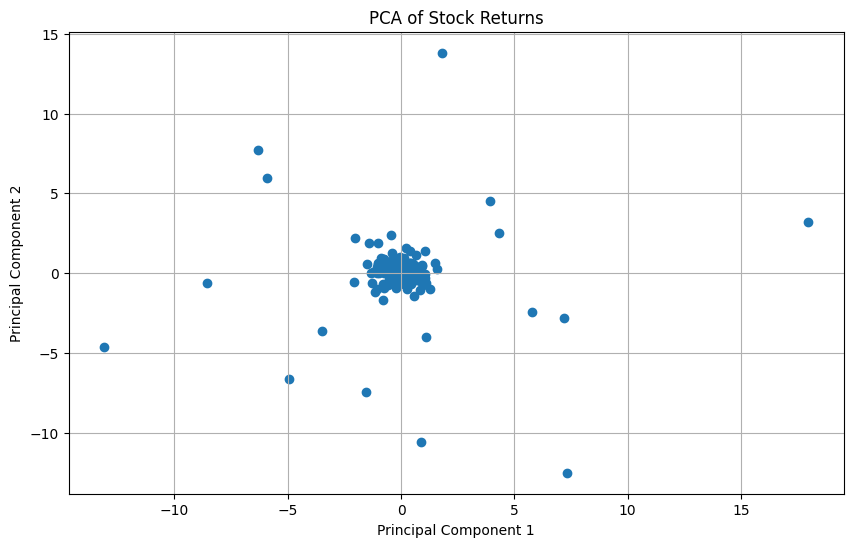

In [3]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Stock Returns')
plt.grid(True)
plt.show()


In the plot, you may observe some points that are far away from the cluster of points. These could be potential anomalies.

## Step 3: To further analyze the anomalies, we can look at the reconstruction error:

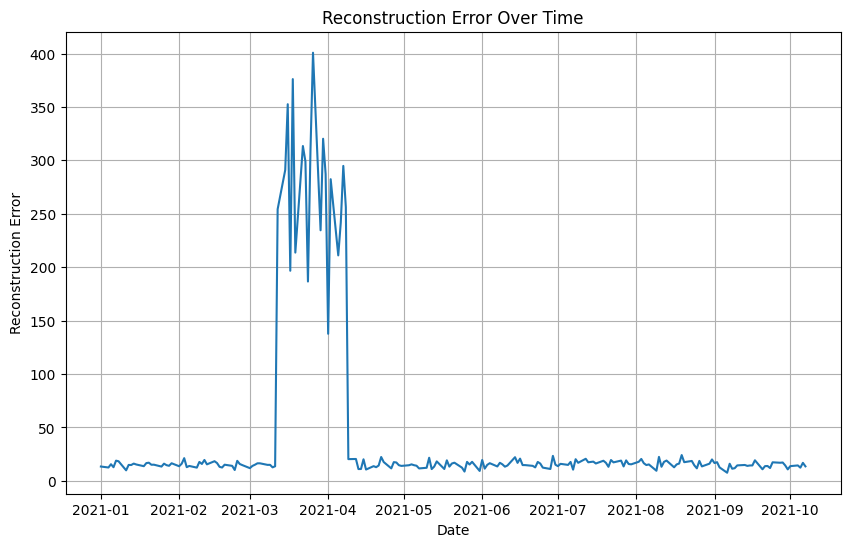

In [4]:
# Inverse transform the PCA data to get the reconstructed data
reconstructed_data = pca.inverse_transform(pca_data)

# Calculate the reconstruction error
reconstruction_error = np.sum((scaled_data - reconstructed_data) ** 2, axis=1)

# Plot the reconstruction error over time
plt.figure(figsize=(10, 6))
plt.plot(dates, reconstruction_error)
plt.xlabel('Date')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error Over Time')
plt.grid(True)
plt.show()


In this plot, you can see spikes in the reconstruction error corresponding to the anomalies we introduced.

## Step 4: Discussion of our findings

### Limitations:

- **Linearity**: PCA assumes linearity in the data. If the anomalies have a non-linear relationship with the normal data, PCA might not effectively detect them.
- **Separation of Anomalies**: PCA might not detect anomalies that are not well-separated from the normal data in the lower variance dimensions.
- **Choice of Components**: The number of principal components retained can affect the detection of anomalies. Retaining too few components might miss some anomalies, while retaining too many might include noise.

In practice, you would need to carefully preprocess the data, choose the appropriate number of components, and consider using additional techniques or algorithms to complement PCA for more effective anomaly detection in financial datasets.